In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_pcp = pd.read_csv('combined_pcp.csv', index_col=0)

In [7]:
df_pcp.index = pd.to_datetime(df_pcp.index)

In [8]:
df_pcp.head()

,"(8.25, 77.0)","(8.25, 77.25)","(8.25, 77.5)","(8.25, 77.75)","(8.5, 76.75)","(8.5, 77.0)","(8.5, 77.25)","(8.5, 77.5)","(8.5, 77.75)","(8.5, 78.0)",...,"(37.0, 74.25)","(37.0, 74.5)","(37.0, 74.75)","(37.0, 75.0)","(37.0, 75.25)","(37.0, 75.5)","(37.25, 74.5)","(37.25, 74.75)","(37.25, 75.0)","(37.25, 75.25)"
1901-01-01,0.00000,0.0000,0.0,0.11886,0.0,0.0,0.40899,1.4792,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-02,0.00000,0.0000,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-03,0.00000,0.0000,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-04,0.70834,4.1052,0.0,0.00000,0.0,0.0,0.86558,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-05,0.00000,0.0000,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
columns  = df_pcp.columns

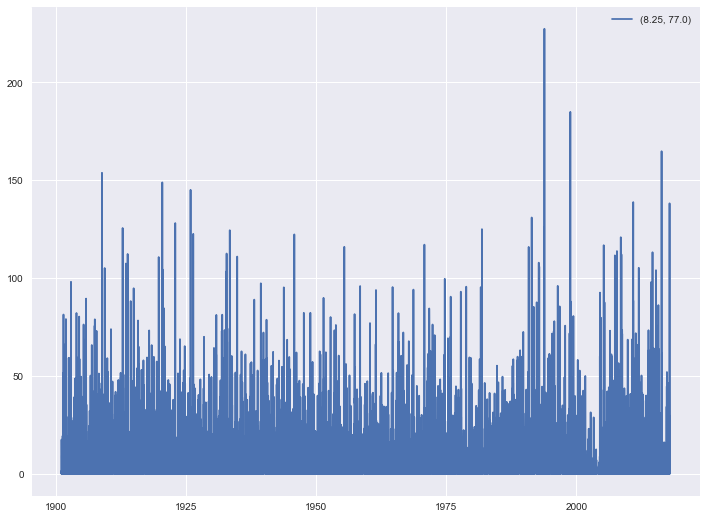

In [78]:
fig, ax = plt.subplots(1, 1, figsize = (12, 9))
df_pcp.plot.line(y = columns[0], ax =ax)

In [40]:
df_pcp_change = df_pcp.diff()
df_pcp_change.dropna(inplace= True)

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [30]:
sns.set()

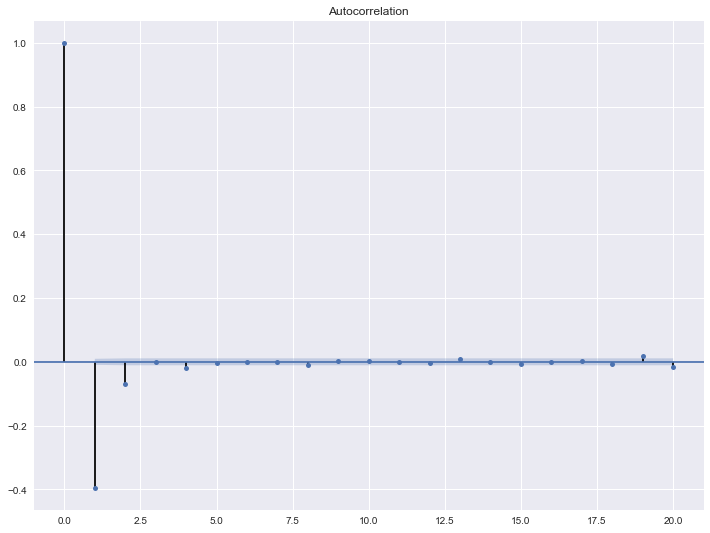

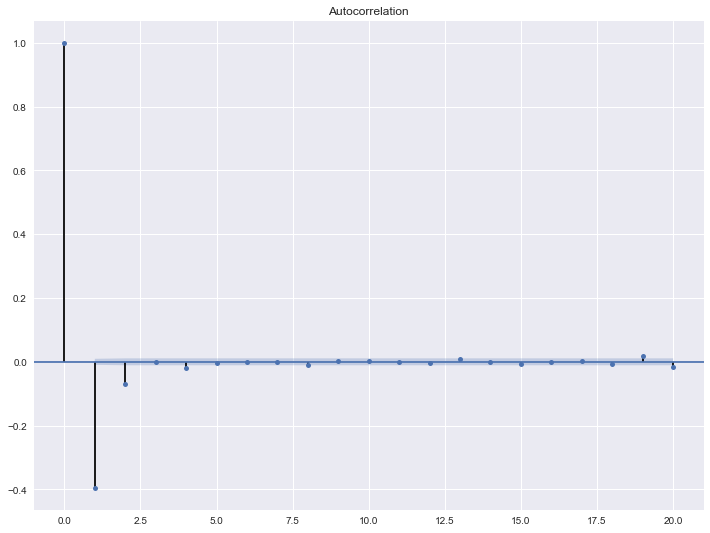

In [41]:
fig1, ax1 = plt.subplots(1, 1, figsize = (12, 9))
plot_acf(df_pcp_change[columns[1]], ax = ax1, lags= 20, alpha = 0.05)

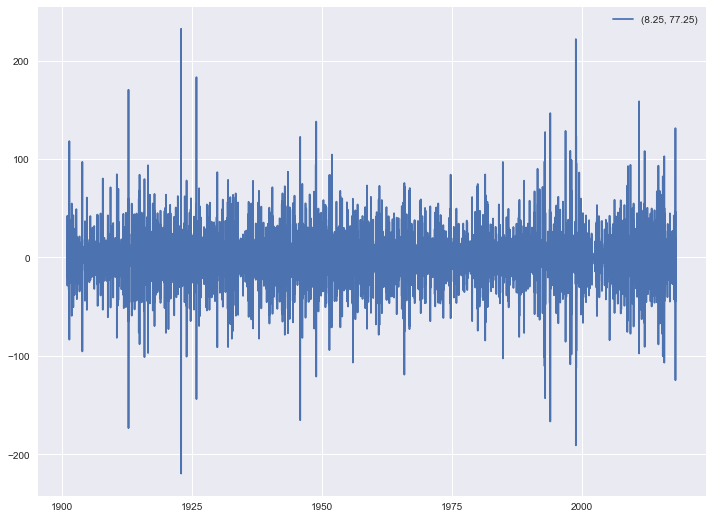

In [44]:
fig2, ax2 = plt.subplots(1, 1, figsize = (12, 9))
df_pcp_change.plot.line(y = columns[1], ax = ax2)

In [85]:
df_pcp_resample = df_pcp.resample(rule = 'M' )

In [69]:
sample_1 = df_pcp_resample.agg({columns[100]:['mean', 'sum']})

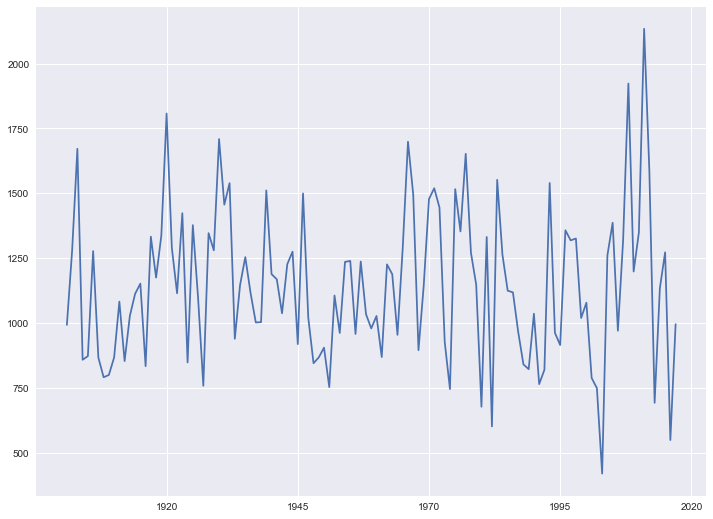

In [70]:
_, ax3 = plt.subplots(1, 1, figsize = (12, 9))
sample_1[columns[100], 'sum'].plot.line(ax = ax3)

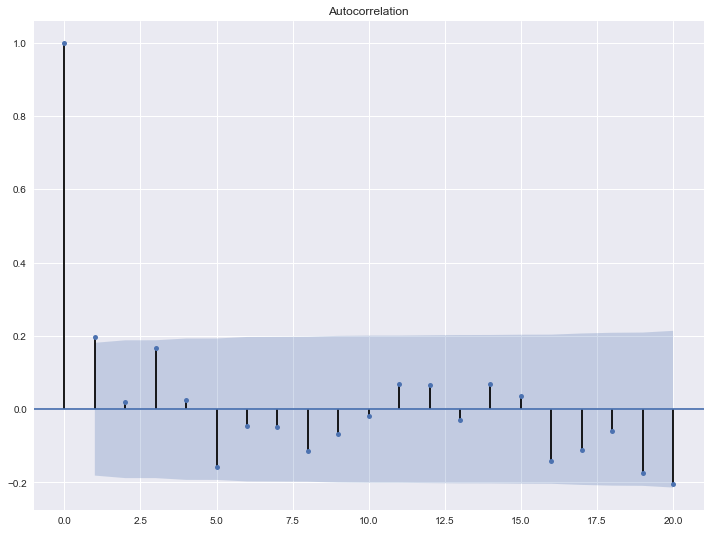

In [80]:
_, ax5 = plt.subplots(1, 1, figsize = (12, 9))
x = plot_acf(sample_1[columns[100], 'sum'], lags= 20, ax= ax5)

In [74]:
sample_1_chg = sample_1.pct_change()
sample_1_chg.dropna(inplace= True)

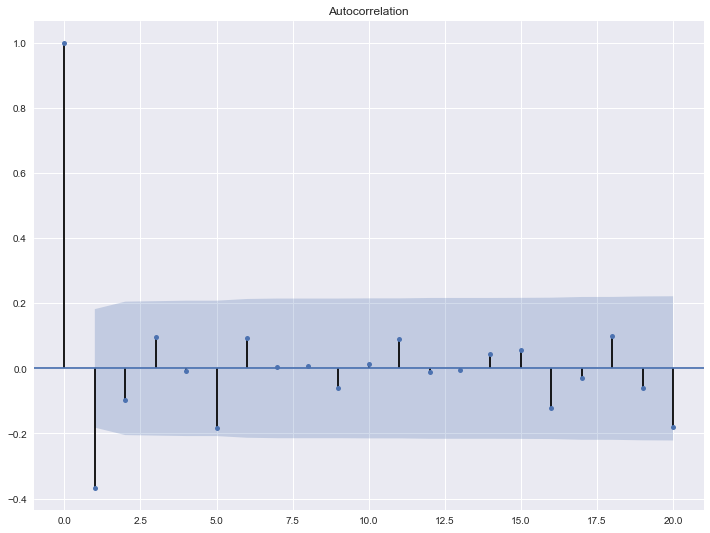

In [81]:
_, ax6 = plt.subplots(1, 1, figsize = (12, 9))
x = plot_acf(sample_1_chg[columns[100], 'sum'], lags= 20, ax = ax6)

Text(0,0.5,'Precipitation (cm)')

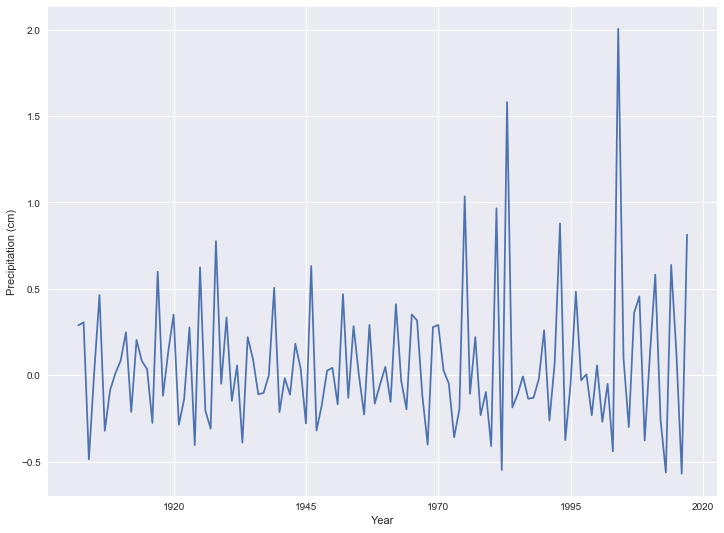

In [77]:
_, ax4 = plt.subplots(1, 1, figsize = (12, 9))
sample_1_chg[columns[100], 'sum'].plot.line(ax = ax4)
ax4.set_xlabel('Year')
ax4.set_ylabel('Precipitation (cm)')

In [88]:
df_pcp_monthly = df_pcp_resample.sum()

In [91]:
df_pcp_monthly

,"(8.25, 77.0)","(8.25, 77.25)","(8.25, 77.5)","(8.25, 77.75)","(8.5, 76.75)","(8.5, 77.0)","(8.5, 77.25)","(8.5, 77.5)","(8.5, 77.75)","(8.5, 78.0)",...,"(37.0, 74.25)","(37.0, 74.5)","(37.0, 74.75)","(37.0, 75.0)","(37.0, 75.25)","(37.0, 75.5)","(37.25, 74.5)","(37.25, 74.75)","(37.25, 75.0)","(37.25, 75.25)"
1901-01-31,25.47575,80.66663,20.57377,58.62333,21.97386,32.44314,77.47693,76.02711,62.55465,69.62694,...,6.40000,6.40000,6.40000,6.40000,6.40000,6.40000,6.40000,6.40000,6.40000,6.40000
1901-02-28,27.52186,45.29990,45.52259,36.21799,80.27432,48.52098,39.15620,32.45446,26.24993,23.34319,...,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
1901-03-31,32.69078,50.20956,97.86748,98.63023,44.21688,32.58902,138.60875,184.47064,118.30335,71.80913,...,3.80000,3.80000,3.80000,3.80000,3.80000,3.80000,3.80000,3.80000,3.80000,3.80000
1901-04-30,180.46661,137.57860,64.73788,53.67374,157.85804,206.81656,79.03880,46.36307,56.33930,48.97078,...,7.10000,7.10000,7.10000,7.10000,7.10000,7.10000,7.10000,7.10000,7.10000,7.10000
1901-05-31,117.65304,31.60091,4.49493,4.34760,132.42361,123.70619,13.86170,0.11053,21.19160,15.15223,...,22.10000,22.10000,22.10000,22.10000,22.10000,22.10000,22.10000,22.10000,22.10000,22.10000
1901-06-30,399.39083,339.57824,137.09380,64.53896,477.45122,493.44365,134.31019,94.40747,28.48027,15.75434,...,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000
1901-07-31,70.25544,18.94790,13.90290,4.74461,141.87509,137.22097,5.92829,2.50560,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1901-08-31,33.15948,1.26521,5.99296,1.96696,55.91508,70.13146,2.54505,0.00000,0.00000,0.00000,...,13.50000,13.50000,13.50000,13.50000,13.50000,13.50000,13.50000,13.50000,13.50000,13.50000
1901-09-30,4.49348,2.71752,29.27370,14.38134,22.95465,25.71888,36.17222,44.62895,38.03098,6.17493,...,5.60000,5.60000,5.60000,5.60000,5.60000,5.60000,5.60000,5.60000,5.60000,5.60000
1901-10-31,161.65801,68.95428,32.82063,19.92062,130.70352,177.36141,56.50314,55.01712,23.86673,10.34919,...,38.50000,38.50000,38.50000,38.50000,38.50000,38.50000,38.50000,38.50000,38.50000,38.50000


In [92]:
df_pcp_monthly.to_csv('pcp_monthly.csv')